In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data

df = pd.read_csv("/home/inventor/Datasets/Medical Cost/Medical_Cost/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
# Drop the Duplicates

df.drop_duplicates(inplace=True)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


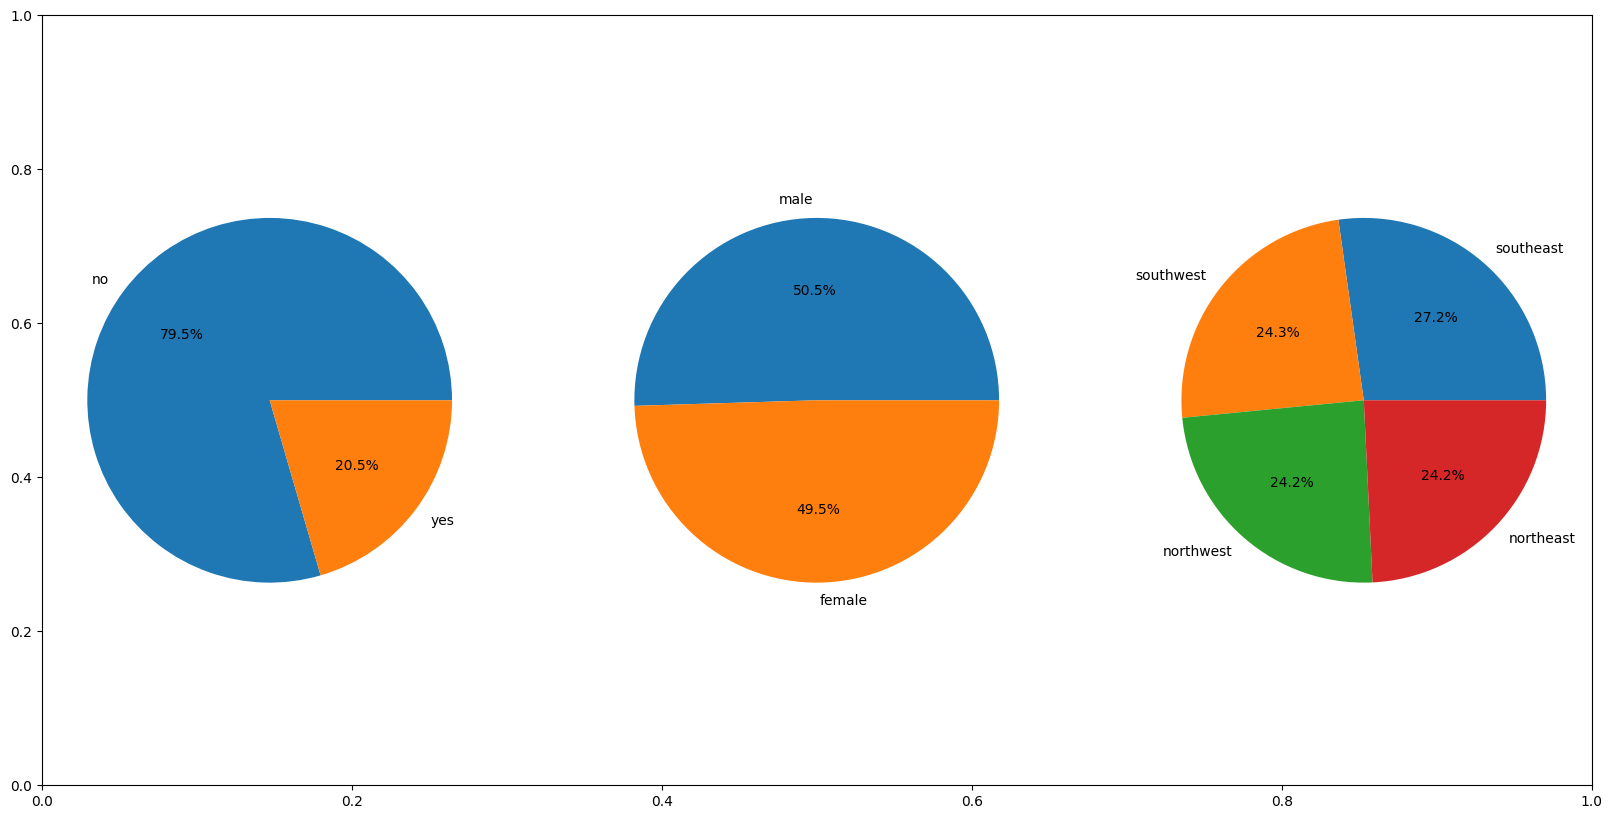

In [14]:
features = ["smoker", "sex", "region"]

plt.subplots(figsize=(20, 10))

for i, cols in enumerate(features):

    plt.subplot(1, 3, i + 1)

    x = df[cols].value_counts()

    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')

plt.show()

In [15]:
import seaborn as sns

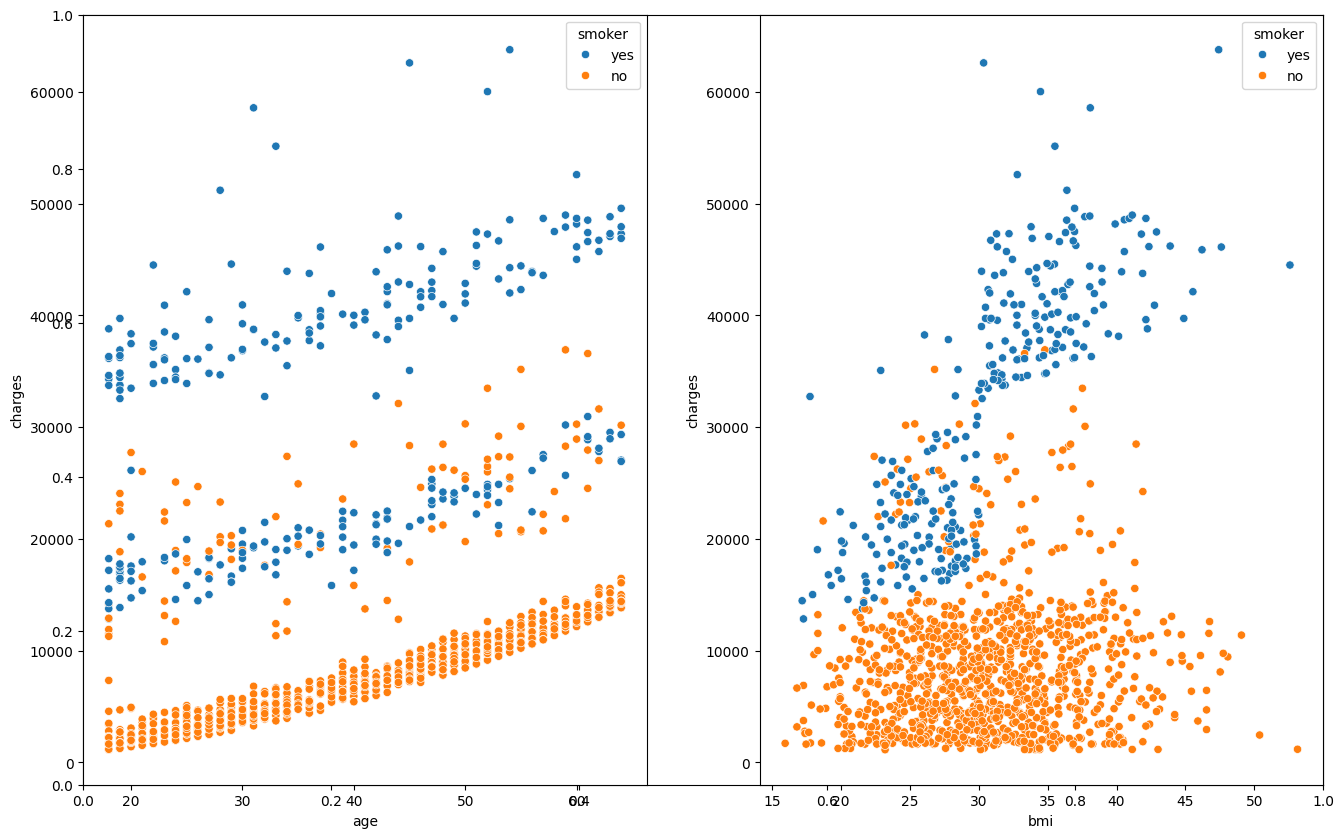

In [17]:
feature_2 = ["age", "bmi"]

plt.subplots(figsize=(16,10))

for i, cols in enumerate(feature_2):

    plt.subplot(1, 2, i + 1)

    sns.scatterplot(data=df, x=cols, y="charges", hue="smoker")

plt.show()

<Axes: ylabel='age'>

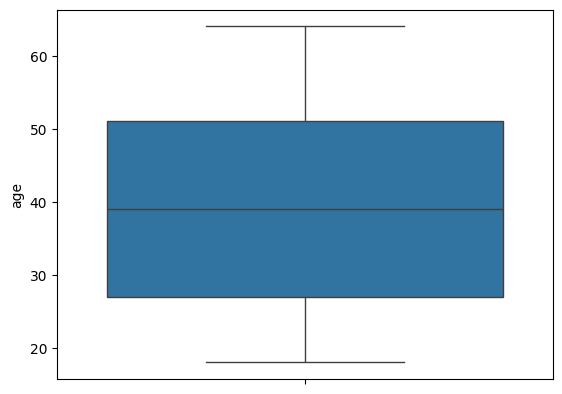

In [18]:
sns.boxplot(df["age"])

<Axes: >

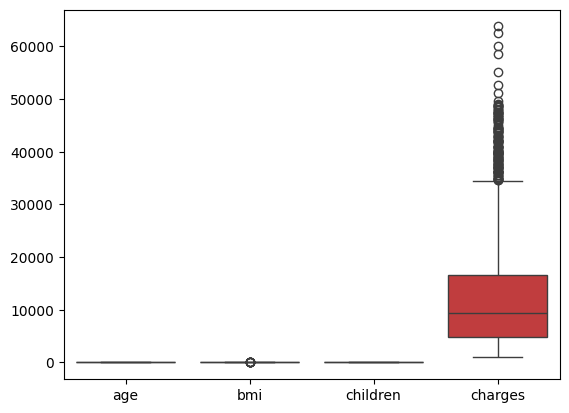

In [19]:
sns.boxplot(df)

<Axes: ylabel='bmi'>

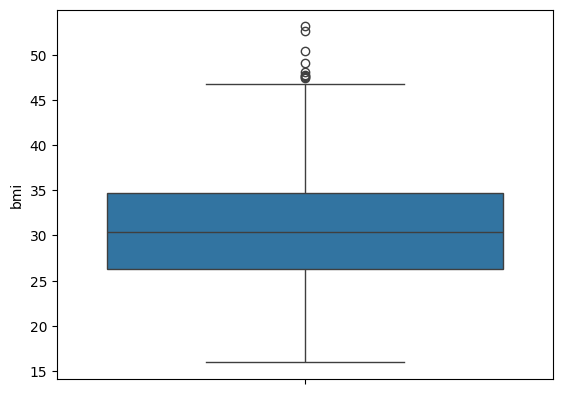

In [20]:
sns.boxplot(df["bmi"])

In [22]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)

iqr = q3 - q1

lowervalue = q1 - 1.5 * iqr
uppervalue = q3 + 1.5 * iqr

print(f"Lower Value: {lowervalue}")
print(f"Upper Value: {uppervalue}")

Lower Value: 13.674999999999994
Upper Value: 47.31500000000001


<Axes: ylabel='bmi'>

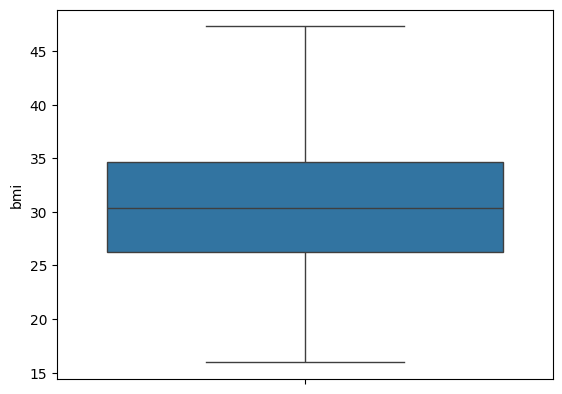

In [24]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(min_capping_dict={"bmi": 13.67}, max_capping_dict={"bmi": 47.315})


df[["bmi"]] = arb.fit_transform(df[["bmi"]])

sns.boxplot(df["bmi"])

In [38]:
num_cols = [feature for feature in df.columns if df[feature].dtype in ["int64", "float64"]]
cat_cols = [feature for feature in df.columns if df[feature].dtype not in ["int64", "float64"]]

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,female,-0.454032,-0.909234,yes,southwest,0.297857
1,-1.511647,male,0.515033,-0.079442,no,southeast,-0.954381
2,-0.799350,male,0.387915,1.580143,no,southeast,-0.729373
3,-0.443201,male,-1.311662,-0.909234,no,northwest,0.719104
4,-0.514431,male,-0.292246,-0.909234,no,northwest,-0.777499


In [81]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', dtype="int64")

encoded = one_hot.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=one_hot.get_feature_names_out(cat_cols), dtype="int64")


encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,female,-0.454032,-0.909234,yes,southwest,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,male,0.515033,-0.079442,no,southeast,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,male,0.387915,1.580143,no,southeast,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,male,-1.311662,-0.909234,no,northwest,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,male,-0.292246,-0.909234,no,northwest,-0.777499,1.0,0.0,1.0,0.0,0.0


In [82]:
encoded_df.drop(["sex", 'smoker', "region"],axis=1, inplace=True)

In [83]:
encoded_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.454032,-0.909234,0.297857,0.0,1.0,0.0,0.0,1.0
1,-1.511647,0.515033,-0.079442,-0.954381,1.0,0.0,0.0,1.0,0.0
2,-0.799350,0.387915,1.580143,-0.729373,1.0,0.0,0.0,1.0,0.0
3,-0.443201,-1.311662,-0.909234,0.719104,1.0,0.0,1.0,0.0,0.0
4,-0.514431,-0.292246,-0.909234,-0.777499,1.0,0.0,1.0,0.0,0.0


In [84]:
encoded_df.isnull().sum()

age                 1
bmi                 1
children            1
charges             1
sex_male            1
smoker_yes          1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [85]:
encoded_df.dropna(inplace=True)

In [86]:
# Change the Datatype

encoded_df["children"] = encoded_df["children"].astype("int64")
encoded_df["sex_male"] = encoded_df["sex_male"].astype("int64")
encoded_df["smoker_yes"] = encoded_df["smoker_yes"].astype("int64")
encoded_df["region_northwest"] = encoded_df["region_northwest"].astype("int64")
encoded_df["region_southeast"] = encoded_df["region_southeast"].astype("int64")
encoded_df["region_southwest"] = encoded_df["region_southwest"].astype("int64")

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop("charges", axis=1), encoded_df["charges"], test_size=0.2, random_state=42)

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [89]:
class PCA_Custom():

    def __init__(self, n_components):

        self.n_components = n_components
        self.variance = None
        self.components = None
        self.explained_variance_ratio = None
    
    def fit(self, X):

        # Center the Data

        X_centered = X - X.mean()

        # Calculate the Cov Matrix

        cov_matrix = np.cov(X_centered, rowvar=False)

        # Find the eigenvalues and eigenvextors

        eigenvalues, eigenvector = np.linalg.eigh(cov_matrix)

        # Sort The Eigenvalues

        sort_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_indices]

        eigenvector = eigenvector[:, sort_indices]

        # Select the TOp Components 

        self.variance = eigenvalues[:self.n_components]
        self.components = eigenvector[:, :self.n_components]

        self.explained_variance_ratio = eigenvalues / np.sum(self.variance)

    
    def transform(self, X):

        X_centered = X - X.mean()

        return np.dot(X_centered, self.components)

    
    def fit_transform(self, X):

        self.fit(X)
        
        return self.transform(X)

In [90]:
pca = PCA_Custom(n_components=5)

In [91]:
X_train = pca.fit_transform(X_train)

X_test = pca.transform(X_test)

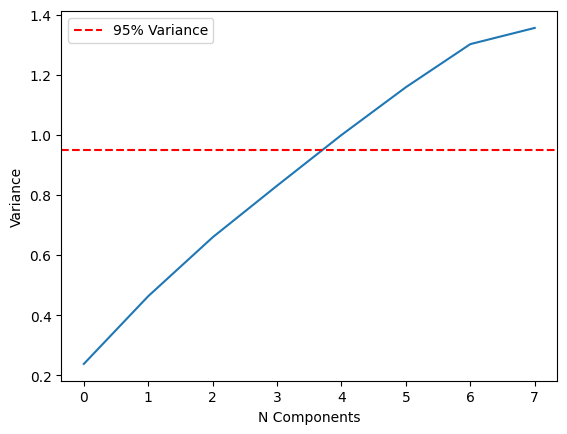

In [92]:
cum_variance = np.cumsum(pca.explained_variance_ratio)

threshold = 0.95

plt.plot(cum_variance)
plt.axhline(y=threshold, color="r", linestyle="--", label="95% Variance")
plt.xlabel("N Components")
plt.ylabel("Variance")
plt.legend()
plt.show()

In [95]:
class Elastic_Custom():

    def __init__(self, learning_rate, epochs, alpha, l1_ratio):

        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            coef_slope = np.dot(X_train.T, X_train).dot(self.coef_) - np.dot(y_train.T, X_train) + np.dot(self.alpha, (np.dot(self.l1_ratio, np.sign(self.coef_)) + np.dot((1 - self.l1_ratio), self.coef_)))

            self.coef_ = self.coef_ - (self.lr * coef_slope)
        
        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)

        y_pred = np.dot(X_test, self.coef_)
        return y_pred

In [96]:
elastic = Elastic_Custom(learning_rate=0.0001, epochs=1000, alpha=0.001, l1_ratio=0.5)

elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)

Coef_: [-0.03422327  0.03300089 -0.0752672   0.13183446  0.31643834  0.23366293]


In [97]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.21618126787340186